## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

## Examples

In [3]:
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
## Check missing values
(df.isnull().sum()/891 )*100
##can see 77% are missing in deck best to remove the column

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
df1 = df #.loc[df.isnull().any(axis = 1)]
df1.isnull().sum()
# df['deck'].dtype
df1['age_na'] = df['age'].fillna(0)
##Ordinal Variable
df1['deck_na'] = df1["deck"].cat.add_categories("Unknown")
df1['deck_na'] = df1['deck_na'].fillna('Unknown')
df1['embarked_na'] = df['embarked'].fillna('Unknown')

In [70]:
from scipy.stats import pointbiserialr

(sex
 male      124
 female     53
 Name: count, dtype: int64,
       sex        age     age_na
 0  female  27.915709  23.203822
 1    male  30.726645  24.123345,
       sex   age  age_na
 0  female  27.0    24.0
 1    male  29.0    25.0,
 <Axes: xlabel='age_na', ylabel='Count'>)

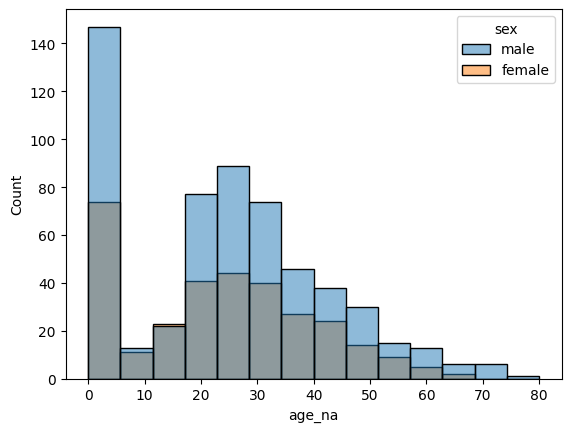

In [8]:
##Age missing More in Male then Female
df1.loc[df1['age_na'] == 0,'sex'].value_counts(), \
    df1.groupby(by ='sex',as_index=False).agg({'age':'mean','age_na':'mean'}),\
    df1.groupby(by ='sex',as_index=False).agg({'age':'median','age_na':'median'}),\
        sns.histplot( df1, x = 'age_na',hue= 'sex') 
##Male ages are more missing,sns.histplot( df1, x = 'age_na',hue= 'sex') ##Male ages are more missing

C:\Users\rachi\AppData\Local\Temp\ipykernel_66752\2884990732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(by ='class',as_index=False).agg({'age':'mean','age_na':'mean'}),\
C:\Users\rachi\AppData\Local\Temp\ipykernel_66752\2884990732.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(by ='class',as_index=False).agg({'age':'median','age_na':'median'}),\


(class
 Third     136
 First      30
 Second     11
 Name: count, dtype: int64,
     class        age     age_na
 0   First  38.233441  32.923241
 1  Second  29.877630  28.091467
 2   Third  25.140620  18.177026,
     class   age  age_na
 0   First  37.0    35.0
 1  Second  29.0    28.0
 2   Third  24.0    20.0,
 <Axes: xlabel='age_na', ylabel='Count'>)

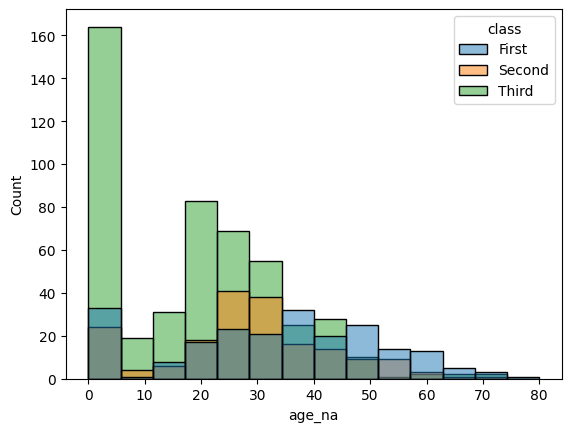

In [9]:
##Majorly thirdclass are missing => there age difference significant
df1.loc[df1['age_na'] == 0,'class'].value_counts(), \
    df1.groupby(by ='class',as_index=False).agg({'age':'mean','age_na':'mean'}),\
    df1.groupby(by ='class',as_index=False).agg({'age':'median','age_na':'median'}),\
        sns.histplot( df1, x = 'age_na',hue= 'class') 

## Handling Missing Values as an Option

In [10]:

df.dropna().shape, df.shape ##significant loss of data, 
#don't use in case data set is small


((182, 18), (891, 18))

In [ ]:
##Dropping columns that have missing values
df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,age_na,deck_na,embarked_na
0,0,3,male,1,0,7.2500,Third,man,True,no,False,22.0,Unknown,S
1,1,1,female,1,0,71.2833,First,woman,False,yes,False,38.0,C,C
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True,26.0,Unknown,S
3,1,1,female,1,0,53.1000,First,woman,False,yes,False,35.0,C,S
4,0,3,male,0,0,8.0500,Third,man,True,no,True,35.0,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True,27.0,Unknown,S
887,1,1,female,0,0,30.0000,First,woman,False,yes,True,19.0,B,S
888,0,3,female,1,2,23.4500,Third,woman,False,no,False,0.0,Unknown,S
889,1,1,male,0,0,30.0000,First,man,True,yes,True,26.0,C,C


In [10]:
##Filling age by mean, median, mode
df['age_na'] =df['age'].fillna(df['age'].mean())
df['age_na_median'] =df['age'].fillna(df['age'].median())

##Although it feels class impact average or median age
df_age_imput = df.groupby(['class','sex'],as_index=False)['age'].mean()
# df_age_imput, int(df_age_imput.loc[(df_age_imput['class'] == 'First') & (df_age_imput['sex'] == 'female'),'age'])
df['age_imputatn'] = df[['class','sex','age']].apply(lambda x: int(df_age_imput.loc[(df_age_imput['class'] == x['class']) \
                                                                                & (df_age_imput['sex'] == x['sex']),'age'] ) \
                                                                                    if np.isnan(x['age']) else  x['age']\
                                                                                          , axis= 1 )
# .agg({'age':'mean','age_na':'mean'})

C:\Users\rachi\AppData\Local\Temp\ipykernel_53256\3576379243.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_imput = df.groupby(['class','sex'],as_index=False)['age'].mean()
C:\Users\rachi\AppData\Local\Temp\ipykernel_53256\3576379243.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['age_imputatn'] = df[['class','sex','age']].apply(lambda x: int(df_age_imput.loc[(df_age_imput['class'] == x['class']) \


In [ ]:
##as missing values are over 70%
df.drop('deck', axis = 1, inplace= True)

In [14]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [15]:
##Categorical Imputation

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [18]:
df[df.isnull().any(axis = 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_na,deck_na,embarked_na,age_na_median,age_imputatn
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,29.699118,Unknown,Q,28.0,26.0
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,Southampton,yes,True,29.699118,Unknown,S,28.0,30.0
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,Cherbourg,yes,True,29.699118,Unknown,C,28.0,21.0
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,Cherbourg,no,True,29.699118,Unknown,C,28.0,26.0
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,Queenstown,yes,True,29.699118,Unknown,Q,28.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,Cherbourg,no,True,29.699118,Unknown,C,28.0,26.0
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,Southampton,no,False,29.699118,Unknown,S,28.0,21.0
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,Southampton,no,True,29.699118,Unknown,S,28.0,26.0
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True,29.699118,Unknown,S,28.0,26.0


## Checking Outlier

<Axes: >

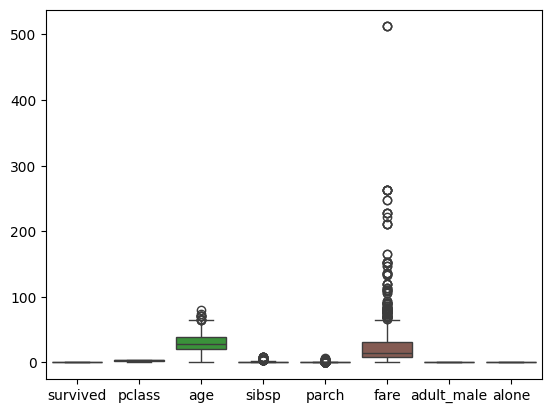

In [6]:
import seaborn as sns
sns.boxplot(df)

<Axes: ylabel='age'>

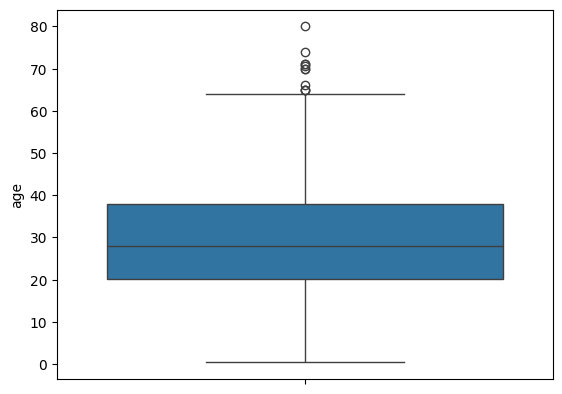

In [8]:
sns.boxplot(df, y = 'age' )

In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,age_na,age_na_median,age_imputatn
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.361582,29.207823
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.019697,13.305449
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,21.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,28.000000,26.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,36.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000


In [12]:
##Outlier Computation 

np.quantile(df['age_imputatn'],[0,0.25,0.5,0.75,1] )

array([ 0.42, 21.  , 26.  , 36.  , 80.  ])